In [1]:
import spotpy
import os
import sys
import pandas as pd
import numpy as np
import subprocess
import shutil

In [2]:
sys.path.insert(1, 'd:/Projects/Tools/daycentpy_git')

In [3]:
from daycentpy import dc_handler

- Set a working directory as project folder
- provide a path to your model folder

In [4]:
pwd = "d:/Projects/Tools/DayCent-CUTE/analysis/cali/"
md = "d:/Projects/Tools/DayCent-CUTE/analysis/Wooster/"

In [5]:
m1 = dc_handler.DCinit(pwd, md)

    We found DayCent parameter base file.
    Open the file and select parameters you are goint to use ..., 
    then save it as 'seleted_pars.csv'.


In [6]:
os.getcwd()

'd:\\Projects\\Tools\\DayCent-CUTE\\analysis\\cali'

In [7]:
sel_pars_df = m1.read_sel_dc_pars()

You have selected a total of 29 parameters.


In [8]:
sel_pars_df

,name,select,default,min,max,category
0,ANEREF(1),1,1.500000,1.000000,2.0000,fix
1,ANEREF(2),1,3.000000,2.800000,5.0000,fix
2,ANEREF(3),1,1.000000,0.200000,1.1000,fix
3,DAMR(1_1),1,0.020000,0.002000,0.3000,fix
4,DAMRMN(1),1,15.000000,5.000000,30.0000,fix
5,DEC1(1),1,3.900000,3.000000,5.0000,fix
6,DEC1(2),1,4.900000,3.000000,7.0000,fix
7,DEC2(1),1,14.800000,12.000000,18.0000,fix
8,DEC2(2),1,18.500000,16.000000,21.0000,fix
9,DEC3(1),1,6.000000,4.000000,8.0000,fix


In [8]:
os.getcwd()

'd:\\Projects\\Tools\\DayCent-CUTE\\analysis\\cali'

In [9]:
os.chdir(os.path.join(os.getcwd(),'main'))

In [10]:
with open("DayCentRUN.DAT", "r") as f:
    data = [x.strip().split() for x in f]
print('')
print('  Simulation start ...')

for l, i in enumerate(range(len(data))):
    if len(data[i]) == 0:
        mlines = l
# mlines indicate only lines for model info
for i in range(mlines):
    if os.path.isfile(data[i][1]+".bin"):
        os.remove(data[i][1]+".bin")
    if len(data[i]) > 2:
        comline = 'DDcentEVI.exe -s {} -n {} -e {}'.format(data[i][1], data[i][1], data[i][3])
    else:
        comline = 'DDcentEVI.exe -s {} -n {}'.format(data[i][1], data[i][1])
    run_model = subprocess.Popen(comline, cwd=".", stdout=subprocess.DEVNULL)
#     run_model = subprocess.Popen(comline, cwd=".")
    run_model.wait()
    comline2 = 'DDlist100.exe {} {} {}'.format(data[i][1], data[i][1], 'outvars.txt')
    # os.system("start cmd {}".format(comline2))
    extract_model = subprocess.Popen(comline2, cwd=".", stdout=subprocess.DEVNULL)
    extract_model.wait()
    print('  Simulation complete ...')
    print('  extracting simulation outputs ...')


  Simulation start ...
  Simulation complete ...
  extracting simulation outputs ...
  Simulation complete ...
  extracting simulation outputs ...
  Simulation complete ...
  extracting simulation outputs ...
  Simulation complete ...
  extracting simulation outputs ...


In [11]:
wd = os.getcwd()

In [12]:
print(wd)

d:\Projects\Tools\DayCent-CUTE\analysis\cali\main


In [14]:
dc_handler.run_fast(wd, sel_pars_df, "mpc", 2000)

Initializing the  Fourier Amplitude Sensitivity Test (FAST)  with  2000  repetitions
Starting the FAST algotrithm with 2000 repetitions...
Creating FAST Matrix
simulation
14
evaluation
14
1 of 2000, min objf=22.0267, max objf=22.0267, time remaining: 04:08:32
Initialize database...
['csv', 'hdf5', 'ram', 'sql', 'custom', 'noData']
* Database file 'FAST_hymod.csv' created.
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulatio

simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evalua

In [16]:
SI

{'S1': [0.0020227771677882693,
  0.008276923380751606,
  0.1249178456137959,
  0.005345938297781753,
  0.005249679572476411,
  0.0053100845464851614,
  0.006036648168048537,
  0.005248399349415174,
  0.005720947004749368,
  0.005552903645225471,
  0.004208759324132592,
  0.003130885956630622,
  0.3173736004554813,
  0.1766079107634059,
  0.005039749805135063,
  0.009023427136083076,
  0.004457498727676203,
  0.12358778661938906,
  0.010847040509779833,
  0.004603425790656203,
  0.0443817635897333,
  0.04791357168423083,
  0.0321699401452618,
  0.46255557324038504,
  0.0543966072703315,
  0.0048510504577090495,
  0.007458775335890803,
  0.18427032029835247,
  0.004907479353237156],
 'ST': [0.20732927467257567,
  0.08603751350616817,
  0.29683784286053816,
  0.18413309919046805,
  0.18550166591071016,
  0.1838844599499765,
  0.20054936408863067,
  0.1805356465802992,
  0.18797833019148047,
  0.16307457910400958,
  0.18162539413138978,
  0.18765509621799614,
  0.43827850595938733,
  0.531

Number of model runs: 2001
Number of parameters: 29
m = 1
Omega = [8. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]
Parameter First Total
{'S1': [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None], 'ST': [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]}
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68]
{'S1': [0.0020227771677882693, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None], 'ST': [0.20732927467257567, None, None, None, 

Number of model runs: 2001
Number of parameters: 29
m = 1
Omega = [8. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]
Parameter First Total
{'S1': [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None], 'ST': [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]}
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68]
{'S1': [0.0020227771677882693, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None], 'ST': [0.20732927467257567, None, None, None, 

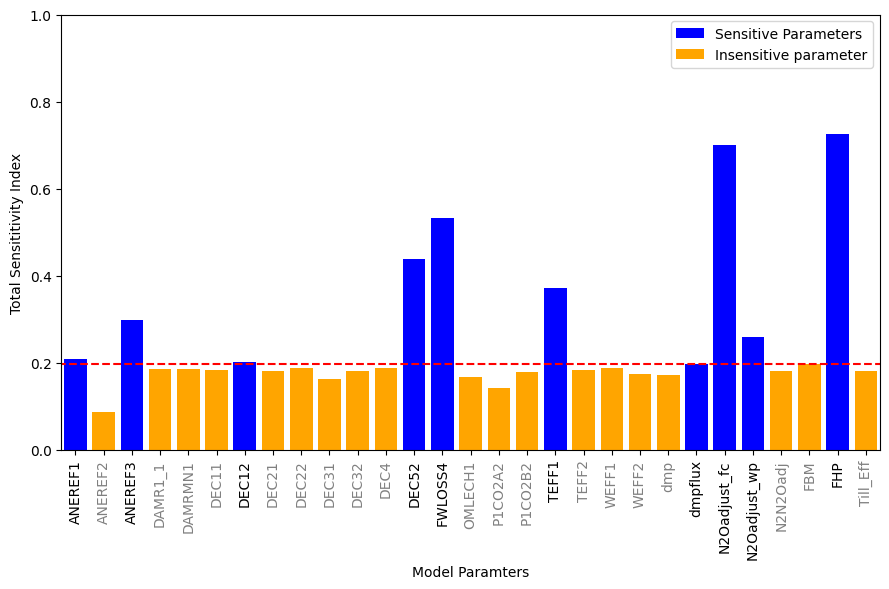

In [15]:
# Load the results gained with the fast sampler, stored in FAST_hymod.csv
results = spotpy.analyser.load_csv_results("FAST_hymod")

# Example plot to show the sensitivity index of each parameter
spotpy.analyser.plot_fast_sensitivity(results, number_of_sensitiv_pars=10)

# Example to get the sensitivity index of each parameter
SI = spotpy.analyser.get_sensitivity_of_fast(results)

In [14]:
# dc_handler.run_dream(wd, sel_pars_df, "mpc", 2000, 20)

Initializing the  Shuffled Complex Evolution (SCE-UA) algorithm  with  2000  repetitions
The objective function will be minimized
Starting burn-in sampling...


PermissionError: [Errno 13] Permission denied: 'd:\\Projects\\Tools\\DayCent-CUTE\\analysis\\cali\\main\\db_results.csv'

In [14]:
dc_handler.demo_cali(wd, sel_pars_df)

Initializing the  DiffeRential Evolution Adaptive Metropolis (DREAM) algorithm  with  2000  repetitions
The objective function will be minimized
Starting the DREAM algotrithm with 2000 repetitions...
Initialize  10  chain(s)...
simulation
14
evaluation
14
1 of 2000, minimal objective function=8.18172, time remaining: 05:41:57
Initialize database...
['csv', 'hdf5', 'ram', 'sql', 'custom', 'noData']
* Database file 'DREAM_dc_bias.csv' created.
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
Beginn of Random Walk
simulation
14
evaluation
14
11 of 2000, minimal objective function=0.139615, time remaining: 01:53:15
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation

simulation
14
evaluation
14
131 of 2000, minimal objective function=0.139615, time remaining: 01:00:03
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
Acceptance rates [%] =69.23 61.54 61.54 53.85 61.54 46.15 84.62 53.85 53.85 46.15
Convergence rates =2.9486 3.1087 3.4372 2.3353 1.738  2.8077 2.7371 4.3033 3.9865 1.5872
 3.3448 4.1023 3.8731 4.3084 3.1332 1.9227 2.8955 2.9243 2.4874 2.6624
 3.423  1.6196 2.7567 4.1034 2.1152 1.9055 1.7314 2.3572 1.9118
simulation
14
evaluation
14
141 of 2000, minimal objective function=0.139615, time remaining: 00:59:18
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
1

simulation
14
evaluation
14
261 of 2000, minimal objective function=0.139615, time remaining: 00:53:05
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
Acceptance rates [%] =65.38 65.38 53.85 42.31 65.38 53.85 57.69 50.   50.   53.85
Convergence rates =2.1558 3.1176 1.7703 2.8741 2.938  2.2465 1.6791 1.8805 1.7132 2.1772
 2.3042 1.7036 2.4431 1.9018 1.723  3.1809 2.1915 1.635  1.9056 2.7907
 1.6687 2.4065 1.5282 2.7229 1.5063 2.2991 2.5181 4.2086 2.6128
simulation
14
evaluation
14
271 of 2000, minimal objective function=0.139615, time remaining: 00:52:39
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
1

simulation
14
evaluation
14
391 of 2000, minimal objective function=0.139615, time remaining: 00:48:10
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
Acceptance rates [%] =64.1  69.23 51.28 46.15 64.1  58.97 53.85 53.85 58.97 51.28
Convergence rates =1.7664 1.7052 1.7813 2.0786 2.2354 1.6836 2.0491 1.5892 1.3555 1.8669
 1.5849 1.9225 2.1253 2.2091 1.626  1.974  1.692  1.4132 1.7016 1.6035
 1.4504 1.6426 1.4752 2.2317 1.7201 1.6283 2.0995 1.6157 1.4632
simulation
14
evaluation
14
401 of 2000, minimal objective function=0.139615, time remaining: 00:47:50
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
1

simulation
14
evaluation
14
521 of 2000, minimal objective function=0.139615, time remaining: 00:43:48
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
Acceptance rates [%] =63.46 61.54 57.69 48.08 59.62 61.54 50.   59.62 61.54 50.  
Convergence rates =1.9245 1.6796 1.9377 2.1747 1.9774 1.7312 1.4699 1.5827 1.4017 1.474
 1.433  1.9213 2.0407 1.7827 1.5881 1.6956 1.4952 1.4143 1.5209 1.3335
 1.4947 1.2969 1.3822 1.6656 1.738  1.7024 1.8682 1.8064 1.6838
simulation
14
evaluation
14
531 of 2000, minimal objective function=0.139615, time remaining: 00:43:29
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14

simulation
14
evaluation
14
651 of 2000, minimal objective function=0.139615, time remaining: 00:39:41
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
Acceptance rates [%] =63.08 60.   58.46 50.77 58.46 55.38 53.85 58.46 58.46 53.85
Convergence rates =1.5957 1.4273 1.4991 1.6614 1.5899 1.9896 1.4955 1.4934 1.8427 1.2982
 1.4337 1.5168 1.8716 1.3908 1.5708 1.6205 1.4653 1.2438 1.4787 1.3134
 1.6537 1.3353 1.7493 1.4717 1.3896 1.555  1.6151 1.6369 1.7963
simulation
14
evaluation
14
661 of 2000, minimal objective function=0.139615, time remaining: 00:39:22
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
1

simulation
14
evaluation
14
781 of 2000, minimal objective function=0.139615, time remaining: 00:35:42
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
Acceptance rates [%] =61.54 65.38 60.26 55.13 60.26 52.56 57.69 61.54 60.26 55.13
Convergence rates =1.4226 1.4553 1.3226 1.5029 1.3791 1.5684 1.5173 1.5084 1.7694 1.3013
 1.4084 1.3197 1.7452 1.2987 1.6831 1.3229 1.3994 1.3421 1.6441 1.2341
 1.8554 1.4675 1.4945 1.3139 1.289  1.706  1.4302 1.3693 1.3802
simulation
14
evaluation
14
791 of 2000, minimal objective function=0.139615, time remaining: 00:35:24
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
1

simulation
14
evaluation
14
911 of 2000, minimal objective function=0.139615, time remaining: 00:31:48
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
Acceptance rates [%] =67.03 65.93 54.95 54.95 62.64 52.75 61.54 63.74 63.74 54.95
Convergence rates =1.2466 1.3867 1.2841 1.43   1.2782 1.2895 1.4818 1.3853 1.4514 1.3829
 1.391  1.1684 1.6021 1.2257 1.3491 1.3561 1.4183 1.4479 1.5953 1.18
 1.7837 1.5443 1.2069 1.3553 1.3229 1.7634 1.36   1.3556 1.331 
simulation
14
evaluation
14
921 of 2000, minimal objective function=0.139615, time remaining: 00:31:30
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14


simulation
14
evaluation
14
1041 of 2000, minimal objective function=0.139615, time remaining: 00:27:56
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
Acceptance rates [%] =66.35 65.38 53.85 58.65 64.42 54.81 60.58 64.42 62.5  58.65
Convergence rates =1.1296 1.2307 1.3498 1.2221 1.2414 1.2341 1.2941 1.3486 1.3407 1.453
 1.1387 1.1482 1.5128 1.3104 1.2025 1.4109 1.3445 1.502  1.4177 1.1585
 1.4746 1.3744 1.1316 1.3057 1.2882 1.7636 1.3012 1.3539 1.3963
simulation
14
evaluation
14
1051 of 2000, minimal objective function=0.139615, time remaining: 00:27:39
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation


simulation
14
evaluation
14
1171 of 2000, minimal objective function=0.139615, time remaining: 00:24:06
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
Acceptance rates [%] =65.81 63.25 55.56 58.97 64.1  52.99 62.39 58.97 59.83 56.41
Convergence rates =1.1106 1.1901 1.4571 1.1751 1.2128 1.3343 1.2383 1.237  1.227  1.3397
 1.133  1.1475 1.4794 1.4594 1.1913 1.3154 1.1279 1.2246 1.4303 1.1743
 1.2672 1.1909 1.1859 1.216  1.3078 1.6175 1.3391 1.3794 1.31  
simulation
14
evaluation
14
1181 of 2000, minimal objective function=0.139615, time remaining: 00:23:48
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation

simulation
14
evaluation
14
1301 of 2000, minimal objective function=0.139615, time remaining: 00:20:18
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
Acceptance rates [%] =65.38 63.85 56.15 59.23 63.85 52.31 61.54 53.85 60.   54.62
Convergence rates =1.0931 1.2356 1.4724 1.2792 1.2153 1.3331 1.2298 1.2212 1.2196 1.2494
 1.1319 1.1532 1.3511 1.5336 1.1623 1.1789 1.0593 1.2264 1.5181 1.226
 1.1964 1.1137 1.1663 1.2157 1.1843 1.5204 1.3664 1.3867 1.263 
simulation
14
evaluation
14
1311 of 2000, minimal objective function=0.139615, time remaining: 00:20:01
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation


simulation
14
evaluation
14
1431 of 2000, minimal objective function=0.139615, time remaining: 00:16:30
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
Acceptance rates [%] =65.03 63.64 51.05 58.74 62.24 55.24 61.54 50.35 59.44 53.15
Convergence rates =1.1049 1.3914 1.464  1.3394 1.282  1.2982 1.2829 1.2034 1.2045 1.2389
 1.1833 1.1944 1.2691 1.5753 1.1104 1.1712 1.0524 1.2487 1.49   1.3274
 1.2435 1.0775 1.1718 1.2664 1.0646 1.4729 1.4099 1.492  1.2765
simulation
14
evaluation
14
1441 of 2000, minimal objective function=0.139615, time remaining: 00:16:13
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation

simulation
14
evaluation
14
1561 of 2000, minimal objective function=0.139615, time remaining: 00:12:43
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
Acceptance rates [%] =65.38 63.46 48.08 58.97 61.54 53.85 61.54 51.28 58.97 53.21
Convergence rates =1.1493 1.4581 1.4426 1.3773 1.4279 1.2986 1.3487 1.1988 1.1588 1.1698
 1.212  1.197  1.1991 1.5314 1.1091 1.1992 1.0767 1.2497 1.4473 1.3221
 1.3099 1.0719 1.1958 1.226  1.0398 1.4185 1.4078 1.5103 1.2197
simulation
14
evaluation
14
1571 of 2000, minimal objective function=0.139615, time remaining: 00:12:25
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation

simulation
14
evaluation
14
1691 of 2000, minimal objective function=0.139615, time remaining: 00:08:56
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
Acceptance rates [%] =63.31 63.31 46.15 59.17 62.13 52.07 59.76 49.7  60.36 55.62
Convergence rates =1.2108 1.4733 1.3063 1.3953 1.4281 1.2218 1.2424 1.1957 1.1725 1.1287
 1.192  1.2613 1.1698 1.4802 1.1121 1.2185 1.1008 1.2796 1.4326 1.3368
 1.3421 1.1076 1.1909 1.2012 1.0552 1.3505 1.4492 1.5671 1.2109
simulation
14
evaluation
14
1701 of 2000, minimal objective function=0.139615, time remaining: 00:08:39
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation

simulation
14
evaluation
14
1821 of 2000, minimal objective function=0.139615, time remaining: 00:05:10
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
Acceptance rates [%] =62.09 63.74 45.05 58.79 62.09 52.2  58.24 46.7  59.34 53.85
Convergence rates =1.2763 1.4538 1.25   1.4631 1.4424 1.1395 1.144  1.238  1.1688 1.1258
 1.171  1.2963 1.2206 1.4845 1.1528 1.2308 1.1536 1.296  1.3894 1.3791
 1.3737 1.1489 1.2414 1.2099 1.062  1.3042 1.4183 1.4213 1.2748
simulation
14
evaluation
14
1831 of 2000, minimal objective function=0.139615, time remaining: 00:04:52
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation

simulation
14
evaluation
14
1951 of 2000, minimal objective function=0.139615, time remaining: 00:01:24
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
Acceptance rates [%] =62.05 64.62 47.18 58.46 60.   52.82 58.46 46.67 61.54 53.85
Convergence rates =1.2716 1.3953 1.2208 1.5051 1.4935 1.0908 1.1022 1.2942 1.1637 1.1731
 1.1263 1.3417 1.231  1.5264 1.1966 1.2209 1.2296 1.3195 1.3503 1.3453
 1.4103 1.1689 1.2263 1.2347 1.0921 1.29   1.3758 1.3367 1.2964
simulation
14
evaluation
14
1961 of 2000, minimal objective function=0.139615, time remaining: 00:01:06
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation